In [1]:
import numpy as np
import Data
#%matplotlib inline
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

In [6]:
def downsample(imgset, size): 
    result = []
    for img in imgset:
        im = np.empty([imgset[0].shape[0]//size, imgset[0].shape[1]//size, 3])
        for i in range(im.shape[2]):
            for m in range(im.shape[1]):
                for n in range(im.shape[0]):
                    im[n,m,i] = img[size*n, size*m, i]
        result.append(im.astype(np.uint8))
    result = np.asarray(result)
    return result

In [7]:
def resize(imgset, shape):
    resize_imgset = []
    for img in imgset:
        resim = scipy.misc.imresize(img, size=shape,interp='nearest')
        resim = Image.fromarray(resim.astype(np.uint8))
        resize_imgset.append(np.asarray(resim))
    return resize_imgset

In [8]:
(x1, x2, y) = Data.loadData('/home/danning/face_verif/lfw_data.h5')


In [9]:
lr_x1 = downsample(x1, 4)
lr_x2 = downsample(x2, 4)

In [10]:
lr_x1 = resize(lr_x1,(112,96,3))
lr_x2 = resize(lr_x2,(112,96,3))

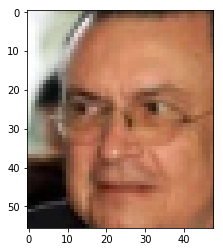

In [47]:
#plt.imshow(lr_x1[0])

In [11]:
Data.compress_data((lr_x1,lr_x2,y),'lr4_lfw.h5')